In [1]:
local_path = "/Users/zhengz11/myscripts/git_clone/pn_kc/"
exec(open(local_path + "connectivity/startup.py").read())

In [6]:
exec(open(local_path + "connectivity/analysis.py").read())

/Users/zhengz11/myscripts/git_clone/pn_kc/mushroom_2to3/build_connectivity.py:541: RuntimeWarning: invalid value encountered in double_scalars
  n = ci_matrix[col, row]*2 / np.sum(conn[(col,row),:])


In [ ]:
# above are all good

In [40]:
# comm_anno_ids = df_lookup('glom_id', comm_ids,'glom_anno_id', glom_btn_table)

comm_idx = find_elements(ana_rd.conn_data['glom_kc_in_claw_unit'].col_ids, comm_anno_ids)

comm_conn = ana_all_rd.conn_data['glom_kc_in_claw_unit'].conn['1s'][:,comm_idx]

pd.Series(comm_conn.sum(1)).value_counts()



0.0    376
1.0    313
2.0    249
3.0    208
4.0    134
5.0     50
6.0     18
7.0      6
8.0      2
dtype: int64

In [35]:
ana_rd.conn_data.keys()

dict_keys(['bouton_claw', 'bouton_kc', 'pn_kc', 'pn_kc_contracted', 'glom_kc_contracted', 'pn_claw_contracted', 'glom_claw_contracted', 'glom_claw_in_claw_unit', 'glom_kc_in_claw_unit'])

In [23]:
comm_conn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
comm_anno_ids = df_lookup('glom_id', comm_ids,'glom_anno_id', glom_btn_table)

[1419110,
 2500472,
 1419073,
 1419214,
 1419219,
 1419070,
 1419230,
 1419178,
 1419211,
 1283123]

In [39]:
comm_anno_ids = df_lookup('short_glom_name', comm_gloms + ['DL2d','DC1','DM6'], 'glom_anno_id', glom_btn_table)

In [15]:
comm_gloms

['DM2', 'DP1m', 'VM2', 'DL2v', 'DM3', 'DM4', 'DM1', 'VM3', 'VA2', 'VA4']

/Users/zhengz11/myscripts/git_clone/pn_kc/mushroom_2to3/build_connectivity.py:541: RuntimeWarning: invalid value encountered in double_scalars
  n = ci_matrix[col, row]*2 / np.sum(conn[(col,row),:])


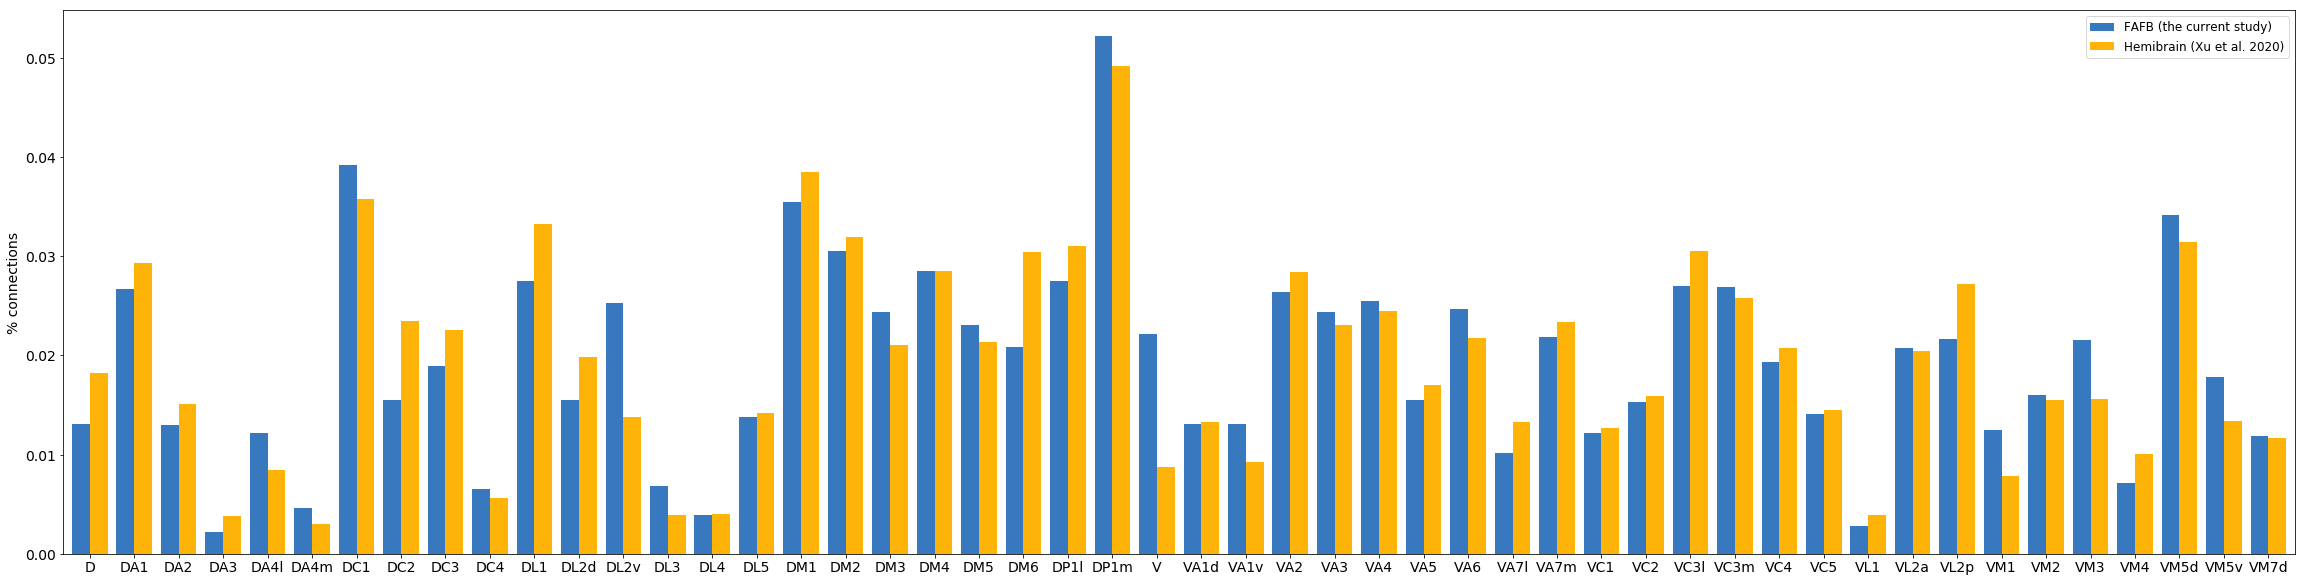

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pn_kc_path = "/Users/zhengz11/myscripts/git_clone/pn_kc/"
# exec(open(pn_kc_path + "/connectivity/analysis.py").read())
# exec(open(pn_kc_path + "/connectivity/startup.py").read())

# %run startup_py3.py
# %run load_pn_metadata_v2.py
# %run medium_term_functions.py

local_path = "/Users/zhengz11/myscripts/git_clone/pn_kc/"
exec(open(local_path + "connectivity/load_pn_metadata_v2.py").read())

data_path = local_path + "data/skids/"
pn_skids = load_json(data_path + "pn")
rd = load_json(data_path + "RandomDraw")
t1p = load_json(data_path + "t1p")

path = '/Users/zhengz11/myscripts/git_clone/pn_kc/data/'
ana_all_rd = ar.Analysis.init_connectivity(path, pn_skids, rd + t1p, 'pn_all_kc')

exec(open(local_path + "connectivity/load_pn_tbl.py").read())

# this piece is copied from 191022-rerun_figs.py
##--------------------------------------------
conn_data = ana.conn_data['pn_kc']
pn_gloms = df_lookup('glom_anno_id',
[ana.pn_mapping.skids_to_types(i)[0] for i in conn_data.col_ids],'short_glom_name',glom_btn_table)

t11 = np.copy(conn_data.conn['5s'])
t11[np.where(t11)]=1
pn_connections = t11.sum(0)

fafb_pn_tbl = pd.DataFrame({'fafb_glom': pn_gloms, 'fafb_connections': pn_connections})
fafb_glom_tbl = fafb_pn_tbl.groupby(['fafb_glom']).sum().assign(fafb_perc_connections=lambda x: x.fafb_connections/sum(x.fafb_connections))
fafb_glom_tbl['glom'] = fafb_glom_tbl.index
fafb_glom_tbl['fafb_glom'] = fafb_glom_tbl.index

# read the hemibrain downloaded data

# hemi_path = local_path + "/Users/zhengz11/myscripts/data_results/200331-hemibrain_data/"
hemi_glom_tbl = pd.read_excel(local_path + 'data/200331-hemibrain_pn_connections_3syn.xlsx', sheet_name="glom")

glom_merged_tbl =pd.merge(hemi_glom_tbl, fafb_glom_tbl, how='outer', on='glom')[:51].sort_values('glom')

comm_gloms = df_lookup('glom_id', comm_ids, 'short_glom_name', glom_btn_table)

p_tbl = glom_merged_tbl.copy()

fig, ax = plt.subplots()
ind = p_tbl.index
width = 0.4

r1 = ax.bar(ind + 0.2, p_tbl.fafb_perc_connections, width, color=sns.xkcd_palette(['windows blue']), align='center')

r2 = ax.bar(ind + 0.6, p_tbl.glom_perc_conn, width, color=sns.xkcd_palette(['amber']), align='center')

ax.legend((r1[0], r2[0]), ['FAFB (the current study)', 'Hemibrain (Xu et al. 2020)'], fontsize=12, loc='upper right')

plt.xticks(ind + 0.4, p_tbl.glom)

ax.set_ylabel('% connections', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlim(-0.2,50)
fig.set_size_inches(40,10)

In [42]:
save_path = "/Users/zhengz11/myscripts/data_results/200331-hemibrain_data/"

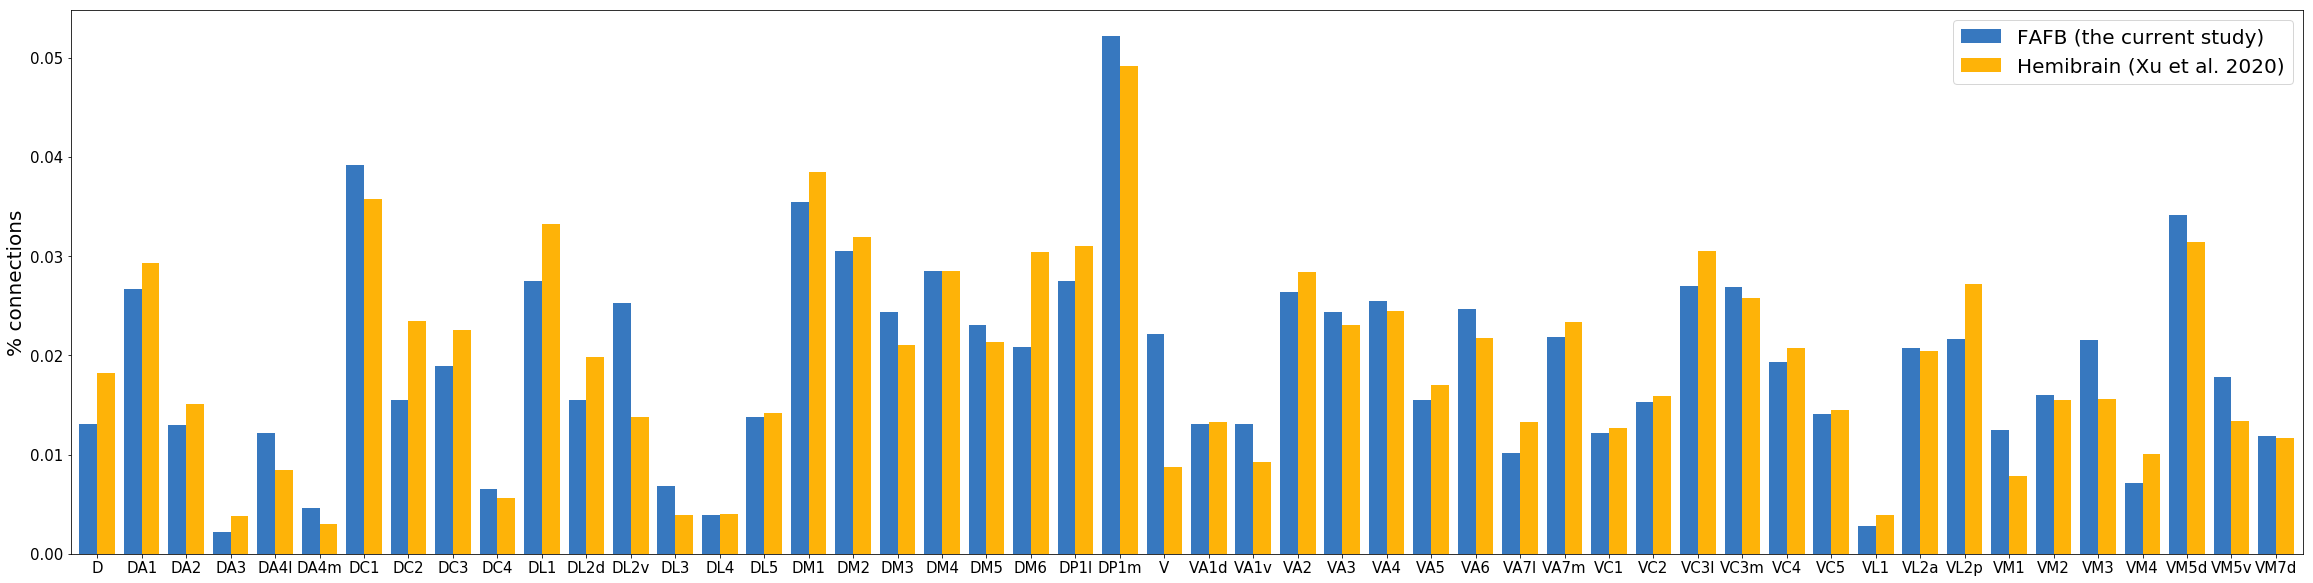

In [46]:
fig, ax = plt.subplots()
ind = p_tbl.index
width = 0.4

r1 = ax.bar(ind + 0.2, p_tbl.fafb_perc_connections, width, color=sns.xkcd_palette(['windows blue']), align='center')

r2 = ax.bar(ind + 0.6, p_tbl.glom_perc_conn, width, color=sns.xkcd_palette(['amber']), align='center')

ax.legend((r1[0], r2[0]), ['FAFB (the current study)', 'Hemibrain (Xu et al. 2020)'], fontsize=20, loc='upper right')

plt.xticks(ind + 0.4, p_tbl.glom)

ax.set_ylabel('% connections', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(-0.2,50)
fig.set_size_inches(40,10)
fig.savefig(save_path + "200408-compare_fafb_hemibrain_connections.png",dpi=600, bbox_inches='tight')